In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [6]:
from pathlib import Path

from cycler import cycler

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches


from matplotlib import rcParams

import numpy as np
import pandas as pd


import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import geopandas as gpd

import intro_plots as ip

paper_path = Path('../../paper/figures/')

slide_path = Path('../../slides/figures/intro/')
proposal_path = Path('../../draft/figures/intro/')
#rcParams['font.family'] = 'Segoe Print'

In [7]:
ny_all = pd.read_csv("nydata")

ny = ny_all[ny_all['NAME'].isin(ip.cdict.keys())].copy()

ny['DATES'] = pd.to_datetime(ny['DATE'])

nymap = ny.groupby('NAME').agg({'TAVG':'mean', 'LATITUDE':'mean', 'LONGITUDE':'mean'})

nygdf = gpd.GeoDataFrame(nymap['TAVG'],  geometry=gpd.points_from_xy(nymap['LONGITUDE'], nymap['LATITUDE']))

ny['TEMP'] = ny['TAVG'].apply(lambda x: f"{x:2.2f}")

dfs = ny[['DATE', 'LATITUDE', 'LONGITUDE', 'TEMP', 'NAME']].sort_values(by='DATE').head(10)

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', 
                                         category='cultural', name=shapename)
nystate = gpd.read_file(states_shp)

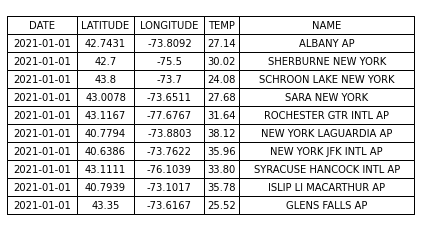

In [8]:
fig, ax = plt.subplots()
tab = ip.plot_table(ax, dfs, ['black', 'black', 'black', 'black', 'black'])
fig.savefig(slide_path/"table.png", bbox_inches='tight')

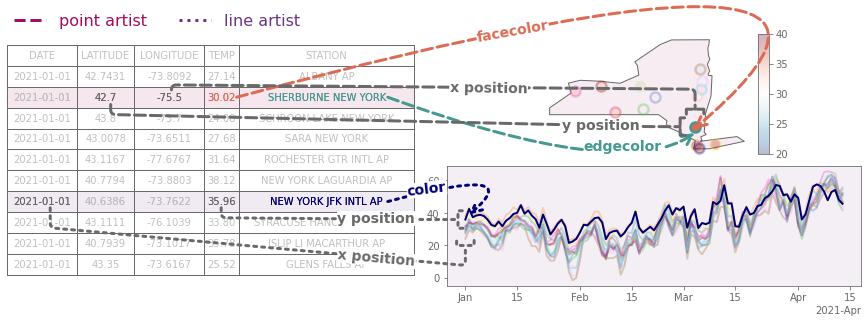

In [24]:
fade='dimgray'
alpha = .3
cmap = mcm.RdBu_r
norm = mcolors.Normalize(vmin=20, vmax=40)
station_map = 'STONYKILL NEW YORK'
station_time = 'NEW YORK JFK INTL AP'
    
fig, axd = plt.subplot_mosaic([['table', 'map'],
                               ['table', 'time',]], 
                              constrained_layout=True, figsize=(12,4))
tab = ip.plot_table(axd['table'], dfs, ['black', 'black', 'black', 'black', 'black'],  
                                 edgecolor=fade, textcolor='silver')
tab[(0,4)].get_text().set_text('STATION')

ip.plot_map(axd['map'], nygdf, nystate, cmap, norm, fade, alpha, station_map)

ip.plot_time(axd['time'], ny, fade, alpha, station_time)

#arrows
arrow_kws = {'linewidth':3, 'mutation_scale':25} 
font_kw = {'fontsize':14, 'fontweight':'bold', 'va':'center', 'ha':'left', 'zorder':15}
bbox = {'facecolor':'white', 'edgecolor':'white','pad':.02}
pos_color = 'dimgray'

#map
mls = 'dashed'
arrow_kws['linestyle'] = mls 



#x position
xpx, xpy = ip.source_cell(tab[(2,2)], pos_color, .5, .85)
xpos_map = mpatches.ConnectionPatch(xyA=(xpx, xpy), coordsA=axd['table'].transData,
                                     xyB=(-73.9, 42.2), coordsB=axd['map'].transData,   
                         arrowstyle="-[,widthB=.35, angleB=0", 
                        connectionstyle="arc,angleA=90, angleB=90,armA=5, armB=20,rad=5", 
                                    color=pos_color, zorder=10, **arrow_kws)
fig.add_artist(xpos_map)
fig.text(.52, .8, "x position", bbox=bbox, rotation=-1, color=pos_color, **font_kw)

#y position
ypx, ypy = ip.source_cell(tab[(2,1)], pos_color, yr=.15)
ypos_map = mpatches.ConnectionPatch(xyA=(ypx, ypy), coordsA=axd['table'].transData,
                                     xyB=(-74.5, 41.5), coordsB=axd['map'].transData,   
                         arrowstyle="-[,widthB=.35, angleB=0", 
                                    connectionstyle='arc,angleA=270, angleB=180,armA=10, armB=30,rad=5', 
                                    color=pos_color,zorder=10, **arrow_kws)#"angle,angleA=90,angleB=180"
fig.add_artist(ypos_map)
fig.text(.65,.67, "y position", color=pos_color, bbox=bbox, **font_kw)


#edgecolor
edge_color = ip.cdict[station_map]
ex, ey = ip.source_cell(tab[(2,4)], edge_color, xr=.9)
edge_map = mpatches.ConnectionPatch(xyA=(ex, ey), coordsA=axd['table'].transData,
                                    xyB=(-73.9, 41.25), coordsB=axd['map'].transData,   
                                    arrowstyle="->", connectionstyle="angle3, angleA=-20, angleB=-145", 
                                    color=edge_color,**arrow_kws)
fig.add_artist(edge_map)
fig.text(.675,.6, "edgecolor", color=edge_color, bbox=bbox, **font_kw)

#facecolor
face_color = cmap(norm(nygdf['TAVG'][station_map]))
fx, fy = ip.source_cell(tab[(2,3)], face_color, xr=.97)
face_map = mpatches.ConnectionPatch(xyA=(fx, fy), coordsA=axd['table'].transData,
                                    xyB=(-73.95, 41.4), coordsB=axd['map'].transData,
                                    arrowstyle="->", connectionstyle="angle3, angleA=15,angleB=-140", 
                                    color=face_color,**arrow_kws)
fig.add_artist(face_map)
fig.text(.55, 1.0, "facecolor", color=face_color, bbox=bbox, rotation=10, **font_kw)


# time
tls = 'dotted'
arrow_kws['linestyle'] = tls
#x position
xpx, xpy = ip.source_cell(tab[(7,0)], pos_color, yr=.2)

xpos_map = mpatches.ConnectionPatch(xyA=(xpx, xpy), coordsA=axd['table'].transData,
                                     xyB=(18628, 20), coordsB=axd['time'].transData,   
                         arrowstyle="-[,widthB=.35, angleB=0", 
                        connectionstyle="arc,angleA=-90, angleB=-90,armA=20, armB=20,rad=5", 
                                    color=pos_color, zorder=10, **arrow_kws)
fig.add_artist(xpos_map)
fig.text(.39, .21, "x position", bbox=bbox, color=pos_color, rotation=-5, **font_kw)

#y position
ypx, ypy = ip.source_cell(tab[(7,3)], pos_color, yr=.2)
ypos_map = mpatches.ConnectionPatch(xyA=(ypx, ypy), coordsA=axd['table'].transData,
                                     xyB=(18626, 35.96), coordsB=axd['time'].transData,   
                         arrowstyle="-[,widthB=.35, angleB=0", 
                                    connectionstyle='arc,angleA=270, angleB=180,armA=10, armB=30,rad=5', 
                                    color=pos_color,zorder=10, **arrow_kws)#"angle,angleA=90,angleB=180"
fig.add_artist(ypos_map)
fig.text(.39,.35, "y position", color=pos_color, bbox=bbox, **font_kw)

# color
line_color = ip.cdict[station_time]
cx, cy = ip.source_cell(tab[(7,4)], line_color, xr=.9)
face_map = mpatches.ConnectionPatch(xyA=(cx, cy), coordsA=axd['table'].transData,
                                    xyB=(18629, 39), coordsB=axd['time'].transData,   
                                    arrowstyle="->", connectionstyle="angle3, angleA=15,angleB=-140", 
                                    color=line_color,**arrow_kws)
fig.add_artist(face_map)
fig.text(.47, .45, "color", color=line_color, rotation=7, bbox=bbox, **font_kw)

afont_kws = {'fontsize':24, 'fontweight':'bold', 'va':'center', 'ha':'left', 'zorder':25}

macolor= '#A50B5E'
tacolor= '#6c3483'
[tab[(row, col)].set_facecolor(mcolors.to_rgba(color, alpha=.05)) 
     for col in range(5) for row, color in [(2, macolor), (7, tacolor)]]

for c in axd['map'].get_children():
    if isinstance(c, PatchCollection):
        c.set_facecolor(mcolors.to_rgba(macolor, alpha=.075))
axd['time'].set_facecolor(mcolors.to_rgba(tacolor, alpha=.075))

point_a = mlines.Line2D([],[], linewidth=3, color=macolor, linestyle=mls, label='point artist')
line_a = mlines.Line2D([],[], linewidth=3, color=tacolor, linestyle=tls, label='line artist')

lg = fig.legend(handles=[point_a, line_a], ncol=2, 
           loc='upper left', fontsize=font_kw['fontsize']+2, labelcolor='linecolor', 
                frameon=False, facecolor='none')
fig.savefig(proposal_path/"functions.png", bbox_inches='tight')

In [ ]:
nyjfk = ny[ny['NAME'].str.contains("JFK")]

In [ ]:
nyjfk['TAVG2'] = nyjfk['TAVG']*2

In [ ]:
nyjfk['TEMP2'] = nyjfk['TAVG2'].apply(lambda x: f"{x:2.2f}")

In [ ]:
dfs = nyjfk.head(10)

In [ ]:
fig, axd = plt.subplot_mosaic([['tab1','tab2', 'time']], gridspec_kw={'width_ratios':[1,1,2]},
                              constrained_layout=True, figsize=(9,3))

ocolor = 'tab:blue'
scolor = 'tab:orange'
gcolor = 'tab:green'
table_1 = ip.plot_table(axd['tab1'], dfs[['DATE', 'TEMP']], ['k', ocolor], textcolor=None)
table_2 = ip.plot_table(axd['tab2'], dfs[['DATE', 'TEMP2']], ['k', scolor], textcolor=None)
table_1[(0,1)].get_text().set_text('TEMPERATURE')
table_2[(0,1)].get_text().set_text('TEMPERATURE')

axd['time'].plot('DATES', 'TAVG', data=nyjfk, color=ocolor)
axd['time'].plot('DATES', 'TAVG2', data=nyjfk, color=scolor)
axd['time'].xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.MonthLocator()))
axd['time'].set_ylabel("temperature (°F)")

for (i, (d, t1, t2)) in nyjfk[['DATES', 'TAVG', 'TAVG2']].iloc[::2].iterrows():
    a1 = mpatches.FancyArrowPatch((d, t1), (d,t2), arrowstyle="->",  
                                  linestyle=None, mutation_scale=15, color=gcolor)
    axd['time'].add_artist(a1)

fig.add_artist(ip.add_arrow(axd, axd['tab1'], axd['tab2'], table_1[(0,1)], table_2[(0,1)], ocolor, scolor, gcolor))

fig.savefig(proposal_path/"equivariant.png")

In [ ]:
ip.source_cell(table_1[(2,1)])

In [ ]:
table = np.array([["sun", 1], ["clouds", 4], ['rain', 2], ['lightning', 3], ['storm', 2]])

In [ ]:
fig, axd = plt.subplot_mosaic([['tab','plot'], ['tab', 'bar']], gridspec_kw={'width_ratios':[1,1]}, 
                              constrained_layout=True, figsize=(6,2))

tab = axd['tab'].table(cellText=table.astype('str'), bbox=(0, 0, 1, 1))
tab.set_fontsize('xx-large')
axd['tab'].set(xticks=[], yticks=[], aspect='equal')
axd['plot'].plot(table[:,0], table[:,1].astype(int), color='tab:green')
axd['bar'].bar(table[:,0], table[:,1].astype(int), color='tab:green')
for n in ['bar', 'plot']:
    #axd[n].set_ylim(0,4.1)
    axd[n].set_ylabel("frequency")
    axd[n].xaxis.set_tick_params(rotation=0)
    axd[n].set_yticks([0, 2.5, 5])
    axd[n].set_yticklabels(['0', '2.5', '5'])
axd['bar'].set_ylim(0,5)
axd['plot'].set_ylim(0, 5)

fig.savefig(paper_path/"continuity.png")

In [ ]:
nybar = nygdf.reset_index()
nybar['TEMP'] = nybar['TAVG'].apply(lambda x: f"{x:2.2f}")

In [ ]:
nybar['SHORT'] = nybar['NAME'].str.replace("NEW YORK|AP|INTL|ISLIP LI|GTR|SYRACUSE", "", regex=True)

In [ ]:
nybar['NAME']

In [ ]:
fig, axd = plt.subplot_mosaic([['tab','plot'], ['tab', 'bar']], gridspec_kw={'width_ratios':[1,1]}, 
                              constrained_layout=True, figsize=(12,4))
tab = plot_table(axd['tab'], nybar[['NAME', 'TEMP']], ['k', 'tab:green'], textcolor=None)
tab[(0,1)].get_text().set_text("Temperature")
tab[(0,0)].get_text().set_text("Station")
tab[(0,1)].get_text().set_color("k")
for i in range(len(cdict)):
    station = tab[(i+1,0)].get_text().get_text()
    tab[(i+1,0)].set_facecolor(cdict[station])
    tab[(i+1,0)].set_alpha(.25)
    tab[(i+1,0)].get_text().set_color("black")
axd['bar'].bar(nybar['SHORT'], nybar['TAVG'], color=[cdict[n] for n in nybar['NAME']])
axd['bar'].tick_params("x", rotation=90)
axd['plot'].tick_params("x", rotation=90)
axd['plot'].plot(nybar['SHORT'], nybar['TAVG'], color='tab:green')
axd['plot'].sharex(axd['bar'])
axd['plot'].sharey(axd['bar'])
axd['bar'].set_yticks([0,10,20,30])
axd['bar'].set_xlim(-0.75,13.75)
axd['bar'].set_ylabel("Average Temp (°F)")
axd['plot'].set_ylabel("Average Temp (°F)")
fig.subplots_adjust(hspace=0.)

fig.savefig(proposal_path/"continuity.png")

In [ ]:
df['']

In [ ]:
tab[(0,0)].get_text?

In [ ]:
tab[(0,0)].get_text().get_text()

In [ ]:
fig, axd = plt.subplot_mosaic([['tab','plot'], ['tab', 'bar']], gridspec_kw={'width_ratios':[1,1]}, 
                              constrained_layout=True, figsize=(6,2))
